## Assignment 7 
### Dimensionality reduction

In this assignment, the HTRU2 dataset is used that can be found on [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/HTRU2).

In this notebook, dimensionality reduction techniques are implemented.

In this workbook, feature selection techniques are implemented.  
To minimize the work, classification is done using XGBoost classifier.  
No tuning on parameters is implemented. Every method is using the default parameters.

### Introduction
Introduction on HTRU2 dataset problem can be found on asgmt7_feat_importance_afoudouli.ipynb

Dimensionality reduction refers to the techniques that are used and are able to transform a high dimensional space into a lower dimensional one withouth the loss of much information.  
In Machine Learning, dimesnionality reduction can be classified into data preparation techniques. In can improve an algorithms results, as fewer parameters lead to faster train times, less noise in data and possibly better generalization.  

There are various dimensionality reduction techniques. They can be classified into two categories:
* Linear algebra methods  
Examples include PCA, SVD, LDA 
* Manifold learning methods   
Examples include tsne, UMAP, autoencoders

In [1]:
# if needed install packages uncommenting the following commands
# !pip install xgboost

In [1]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_roc_curve
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import os 

os.chdir('C:/Users/anast/OneDrive/Desktop/MSc/MachineLearning/Assignments/Asgmt7_FeatureSelection/')

In [2]:
data_file = 'HTRU2/HTRU_2.csv'

data = pd.read_csv(data_file, header=None)


feature_names = ["Mean of the integrated profile",
	"Standard deviation of the integrated profile",
	"Excess kurtosis of the integrated profile",
	"Skewness of the integrated profile",
	"Mean of the DM-SNR curve",
	"Standard deviation of the DM-SNR curve",
	"Excess kurtosis of the DM-SNR curve",
	"Skewness of the DM-SNR curve"]

data.columns = feature_names + ["target_class"]

### Principal Component Analysis
Principal Component Analysis, or PCA for short, is a method for reducing the dimensionality of data.  
In its essence, PCA is not a dimensionality reduction algorithm but the properties of principal components make it a data scientist' fevourite when trying to reduce the number of features.  
PCA transform the original N-dimensional dataset, into a set of N new features called principal components. The information contained in a column is the amount of variance it contains. The primary objective of Principal Components is to represent the information in the dataset with as low number of columns as possible. PCs are formed in such a way that the first Principal Component (PC1) explains more variance in original data compared to PC2. Likewise, PC2 explains more than PC3, and so on. Each of the PCs contains weights (called loadings) which are actuale the eigenvectors of the original data X.

The problem can be easier understood on a 2D space.  
Using these, we want to find aprojection that can better "represent" the information in the data. This new column can be thought of as a line that passes through these points. Such a line can be represented as a linear combination of the two columns and explains the maximum variation present in these two columns. It should be in a direction that minimizes the perpendicular distance of each point from the line.

<iframe src="https://gifer.com/embed/H7zW" width=480 height=192.000 frameBorder="0" allowFullScreen></iframe>  

via [GIFER](https://gifer.com)

Some great tutorials can be found on [umetrics](https://blog.umetrics.com/what-is-principal-component-analysis-pca-and-how-it-is-used), [built in](https://builtin.com/data-science/step-step-explanation-principal-component-analysis), [Machine Learning Plus](https://www.machinelearningplus.com/machine-learning/principal-components-analysis-pca-better-explained/).

In [4]:
X = data.drop(columns = 'target_class')
y = data['target_class'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=556, stratify=y)

In [5]:
scaler = StandardScaler()
clf = XGBClassifier(n_jobs=-1)
full_dim_pipe = Pipeline([('scaling', scaler),
                          ('classifier', clf)])

full_dim_pipe.fit(X_train, y_train);  

In [6]:
scaler = StandardScaler()
pca = PCA(n_components=4)
clf = XGBClassifier(n_jobs=-1)

pca_pipe = Pipeline([('scaling', scaler),
                     ('pca', pca),
                     ('classifier', clf)])

pca_pipe.fit(X_train, y_train); 

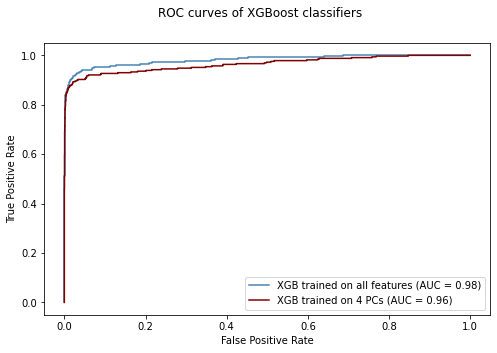

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), sharey='row')
plt.suptitle('ROC curves of XGBoost classifiers')
plot_roc_curve(full_dim_pipe, X_test, y_test, color='steelblue', ax=axs, name='XGB trained on all features')
plot_roc_curve(pca_pipe, X_test, y_test, color='maroon', ax=axs, name='XGB trained on 4 PCs')
plt.show()

In [8]:
def print_metrics(y_test, predictions):  
    print(f'Accuracy {accuracy_score(y_test, predictions)*100:.2f}%'
            f'\nPrecision {precision_score(y_test, predictions)*100:.2f}% '
            f'\nRecall {recall_score(y_test, predictions)*100:.2f}% '
            f'\nF1 {f1_score(y_test, predictions)*100:.2f}% ')

In [9]:
print('Metrics for the model trained using all the available features are:')
print_metrics(y_test, full_dim_pipe.predict(X_test))

print('\nMetrics for the model trained on 4 PCs are:')
print_metrics(y_test, pca_pipe.predict(X_test))

Metrics for the model trained using all the available features are:
Accuracy 98.13%
Precision 93.94% 
Recall 85.06% 
F1 89.28% 

Metrics for the model trained on 4 PCs are:
Accuracy 98.10%
Precision 94.22% 
Recall 84.45% 
F1 89.07% 


### UMAP
TODO add umap section

### Autoencoders

Autoencoder is an unsupervised neural network that compreses the data to a lower dimension (_latent space_) and then reconstructs them back to their original dimesnion.  
It is based on an Encoder-Decoder transformation. The Encoder encodes the data from a high-dimensional space to a lower-dimensional space, while the decoder, does the exact opposite, decoding the lower-dimension data to higher-dimension.   
Practicaally, with this architecture we aim to keep only the important features and remove noise and redundancy (encoding).  
So, practically, we can use the encoder part of the algorithm as a dimensionality reduction algorithm.

<img src="https://miro.medium.com/max/3148/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png" width=600 height=280 />


via [Towards Data Science](https://towardsdatascience.com/applied-deep-learning-part-3-autoencoders-1c083af4d798)

Great resources on autoencoders [OpenGenus](https://iq.opengenus.org/types-of-autoencoder/), [Arxiv Insights](https://www.youtube.com/watch?v=9zKuYvjFFS8) youtube channel, [Keras](https://blog.keras.io/building-autoencoders-in-keras.html) documentation.

In [10]:
# if needed install packages uncommenting the following commands
# !pip install tensorflow
# !pip install keras

In [11]:
from keras.models import Model 
from keras.layers import Input, Dense 
from keras import regularizers
from keras.optimizers import Adam 

In [12]:
scaler_encoder = MinMaxScaler()
X_train_encoder = scaler_encoder.fit_transform(X_train)
X_test_encoder = scaler_encoder.transform(X_test)

In [13]:
input_dim = X_train.shape[1]
encoding_dim = 4  # same dim as with PCA

input_layer = Input(shape=(input_dim, ))
latent_layer = Dense(encoding_dim, activation='tanh')(input_layer)
output_layer = Dense(input_dim, activation='sigmoid')(latent_layer)

# keep the encoder part of the model
encoder = Model(input_layer, latent_layer)

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [14]:
autoencoder.fit(X_train_encoder, X_train_encoder, epochs=10)

Epoch 1/10
448/448 [==============================] - 0s 960us/step - loss: 0.5293
Epoch 2/10
448/448 [==============================] - 1s 1ms/step - loss: 0.4456
Epoch 3/10
448/448 [==============================] - 0s 946us/step - loss: 0.4325
Epoch 4/10
448/448 [==============================] - 0s 879us/step - loss: 0.4282
Epoch 5/10
448/448 [==============================] - 1s 1ms/step - loss: 0.4255
Epoch 6/10
448/448 [==============================] - 0s 924us/step - loss: 0.4221
Epoch 7/10
448/448 [==============================] - 0s 1ms/step - loss: 0.4186
Epoch 8/10
448/448 [==============================] - 0s 895us/step - loss: 0.4160
Epoch 9/10
448/448 [==============================] - 1s 1ms/step - loss: 0.4145
Epoch 10/10
448/448 [==============================] - 0s 937us/step - loss: 0.4138


In [15]:
X_train_encoder = encoder.predict(X_train_encoder)
X_test_encoder = encoder.predict(X_test_encoder)

In [16]:
clf_encoder = XGBClassifier(n_jobs=-1)
clf_encoder.fit(X_train_encoder, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=-1, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

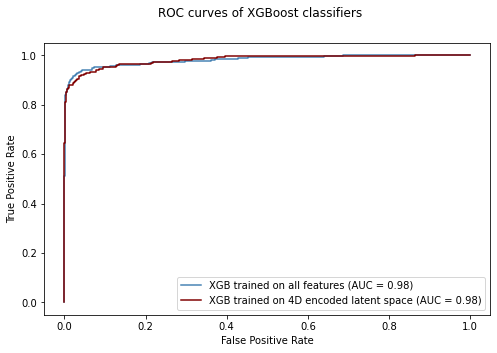

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(8, 5), sharey='row')
plt.suptitle('ROC curves of XGBoost classifiers')
plot_roc_curve(full_dim_pipe, X_test, y_test, color='steelblue', ax=axs, name='XGB trained on all features')
plot_roc_curve(clf_encoder, X_test_encoder, y_test, color='maroon', ax=axs, name='XGB trained on 4D encoded latent space')
plt.show()

In [19]:
print('Metrics for the model trained using all the available features are:')
print_metrics(y_test, full_dim_pipe.predict(X_test))

print('\nMetrics for the model trained on the encoded 4D latent representation are:')
print_metrics(y_test, clf_encoder.predict(X_test_encoder))

Metrics for the model trained using all the available features are:
Accuracy 98.13%
Precision 93.94% 
Recall 85.06% 
F1 89.28% 

Metrics for the model trained on the encoded 4D latent representation are:
Accuracy 98.16%
Precision 93.67% 
Recall 85.67% 
F1 89.49% 
